<a href="https://colab.research.google.com/github/sgkks/EnvDatSci/blob/main/Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#attach to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Install packages for Google Colab
%%capture
!pip install rasterio
!pip install earthpy

In [31]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import plotting_extent
import numpy as np
import earthpy as et
import earthpy.plot as ep

In [32]:
!pip install geopandas

In [33]:
!pip install earthpy
!pip install rtree
!pip install pygeos
!pip install mapclassify>=2.4.0

In [34]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

In [35]:
folder_path = '/content/drive/My Drive/CEE609/ResearchData'

os.chdir(folder_path)

print(os.getcwd())

list_dir = os.listdir(folder_path)

print(list_dir)


/content/drive/My Drive/CEE609/ResearchData
['SYRCityline_Requests_(2021-Present).xml', 'SYRCityline_Requests_(2021-Present).cpg', 'SYRCityline_Requests_(2021-Present).prj', 'SYRCityline_Requests_(2021-Present).shx', 'Syracuse_City_Boundary.xml', 'Syracuse_City_Boundary.shp', 'Syracuse_City_Boundary.prj', 'Syracuse_City_Boundary.cpg', 'Syracuse_City_Boundary.dbf', 'Syracuse_City_Boundary.shx', 'columns.csv', 'usa.prj', 'usa.cpg', 'usa.shx', 'Water_Main_Breaks_(2004-2019).dbf', 'Water_Main_Breaks_(2004-2019).shx', 'Water_Main_Breaks_(2004-2019).prj', 'Water_Main_Breaks_(2004-2019).cpg', 'Water_Main_Breaks_(2004-2019).shp', 'usa.dbf', 'SYRCityline_Requests_(2021-Present).dbf', 'usa.shp', 'SYRCityline_Requests_(2021-Present).shp']


In [36]:
import geopandas as gpd

# Assuming the file is in the current working directory (which you set previously)
file_path = 'Water_Main_Breaks_(2004-2019).shp'

# Read the shapefile using geopandas
water_main_breaks = gpd.read_file(file_path)

# Print some info to check if it loaded correctly
print(water_main_breaks.head())
print(water_main_breaks.info())

    fullDate                location  leakClass month  date weekday    year  \
0 2011-01-14       1205 W FAYETTE ST          0   1.0  14.0    None  2011.0   
1 2011-01-14     1003 JAMESVILLE AVE          0   1.0  14.0    None  2011.0   
2 2011-01-14  PALMER AVE & CHENEY ST          0   1.0  14.0    None  2011.0   
3 2011-01-16       2100 E FAYETTE ST          0   1.0  16.0    None  2011.0   
4 2011-01-17        206 BUTTERNUT ST          0   1.0  17.0    None  2011.0   

  week        lon        lat  ObjectId                          geometry  
0  2.0 -76.175575  43.046733         1  POINT (-8479826.176 5319087.828)  
1  2.0 -76.128918  43.016895         2  POINT (-8474632.427 5314543.828)  
2  2.0 -76.162257  43.030022         3  POINT (-8478343.686 5316542.657)  
3  3.0 -76.113683  43.048158         4   POINT (-8472936.428 5319304.88)  
4  3.0 -76.151936  43.057713         5  POINT (-8477194.752 5320760.511)  
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3042 entries, 0 t

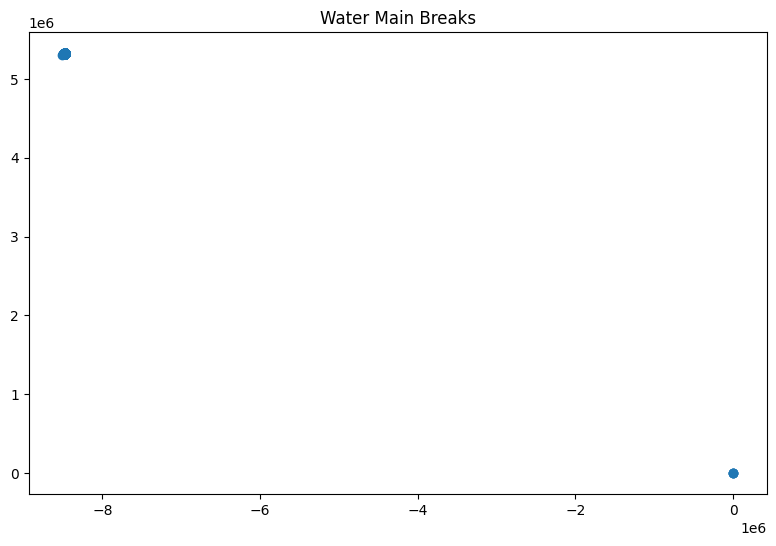

In [43]:
# Plot the data
f, ax1 = plt.subplots(figsize=(12, 6))
water_main_breaks.plot(ax=ax1)

# Add a title to your plot
ax1.set(title="Water Main Breaks")
plt.show()

In [40]:
import geopandas as gpd

# Assuming the file is in the current working directory (which you set previously)
file_path = 'usa.shp'

# Read the shapefile using geopandas
burden_categories = gpd.read_file(file_path)

# Print some info to check if it loaded correctly
print(burden_categories.head())
print(burden_categories.info())

       GEOID10       SF                CF  DF_PFS  AF_PFS  HDF_PFS  DSF_PFS  \
0  01073001100  Alabama  Jefferson County    0.96    0.85     0.72     0.84   
1  01073001400  Alabama  Jefferson County    0.98    0.83     0.92     0.93   
2  01073002000  Alabama  Jefferson County    0.98    0.97     0.94     0.76   
3  01073003802  Alabama  Jefferson County    0.95    0.91     0.62     0.79   
4  01073004000  Alabama  Jefferson County    0.99    0.96     0.96     0.86   

   EBF_PFS  EALR_PFS  EBLR_PFS  ...  AGE_10  AGE_MIDDLE  AGE_OLD  TA_COU_116  \
0     0.86      0.21      0.78  ...    0.13        0.66     0.20         NaN   
1     0.97      0.08      0.91  ...    0.08        0.72     0.18         NaN   
2     0.93      0.08      0.64  ...    0.15        0.71     0.12         NaN   
3     0.97      0.07      0.90  ...    0.14        0.72     0.13         NaN   
4     0.98       NaN      0.95  ...    0.06        0.68     0.24         NaN   

   TA_COUNT_C  TA_PERC  TA_PERC_FE  UI_EXP  

In [41]:
import geopandas as gpd

# Assuming the file is in the current working directory (which you set previously)
file_path = 'SYRCityline_Requests_(2021-Present).shp'

# Read the shapefile using geopandas
existing_potholes = gpd.read_file(file_path)

# Print some info to check if it loaded correctly
print(existing_potholes.head())
print(existing_potholes.info())

         Id              Summary  Rating  \
0  10139153             Potholes       2   
1  10568233  Weekly Trash Pickup       2   
2  10568243  Weekly Trash Pickup       2   
3  10568255            Recycling       2   
4  10568301            Recycling       2   

                                     Address  \
0  101 Ny-5 Syracuse NY 13204, United States   
1   304 Mildred Ave Syracuse, NY, 13206, USA   
2    113 Neutral Ct Syracuse, NY, 13208, USA   
3       100 Arch St Syracuse, NY, 13206, USA   
4       100 Arch St Syracuse, NY, 13206, USA   

                           Descriptio                           Agency_Nam  \
0  Pothole entering lot 3 parking lot  Streets, Sidewalks & Transportation   
1       did not take all of the trash        Garbage, Recycling & Graffiti   
2                             skipped        Garbage, Recycling & Graffiti   
3                             skipped        Garbage, Recycling & Graffiti   
4                   recycling skipped        Garbage, Re

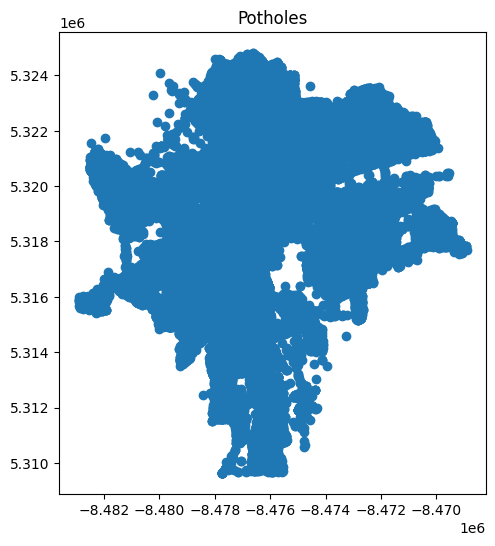

In [45]:
# Plot the data
f, ax1 = plt.subplots(figsize=(12, 6))
existing_potholes.plot(ax=ax1)

# Add a title to your plot
ax1.set(title="Potholes")
plt.show()

In [42]:
import geopandas as gpd

# Assuming the file is in the current working directory (which you set previously)
file_path = 'Syracuse_City_Boundary.shp'

# Read the shapefile using geopandas
boundary_area = gpd.read_file(file_path)

# Print some info to check if it loaded correctly
print(boundary_area.head())
print(boundary_area.info())

   FID  FID_Syracu STATEFP10 COUNTYFP10 TRACTCE10      GEOID10 NAME10  \
0    1          54        36        067    000100  36067000100      1   

       NAMELSAD10 MTFCC10 FUNCSTAT10  ALAND10  AWATER10   INTPTLAT10  \
0  Census Tract 1   G5020          S  4842958   1284980  +43.0691355   

     INTPTLON10  TractID                                           geometry  
0  -076.1730170        1  POLYGON ((-8477821.69 5324574.363, -8477654.82...  
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         1 non-null      int32   
 1   FID_Syracu  1 non-null      int32   
 2   STATEFP10   1 non-null      object  
 3   COUNTYFP10  1 non-null      object  
 4   TRACTCE10   1 non-null      object  
 5   GEOID10     1 non-null      object  
 6   NAME10      1 non-null      object  
 7   NAMELSAD10  1 non-null      object  
 8   MTFCC10     1 non-

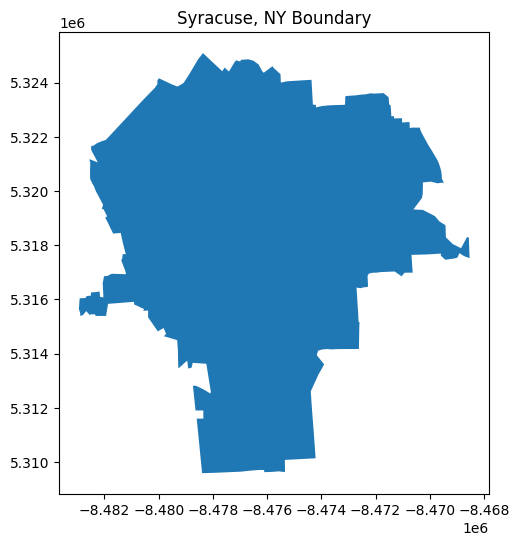

In [46]:
# Plot the data
f, ax1 = plt.subplots(figsize=(12, 6))
boundary_area.plot(ax=ax1)

# Add a title to your plot
ax1.set(title="Syracuse, NY Boundary")
plt.show()